# **Прогнозирование цены на недвижимость**

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("AmesHousing1.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

**Исследование данных**

In [5]:
df.shape

(2930, 82)

In [6]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


построим графики и найдем основные корреляции с ценой продажи.

In [ ]:
# Проверка на наличие выбросов
sns.boxplot(data=df,x="SalePrice")

In [ ]:
#График распределения цены продажи
sns.displot(df["SalePrice"],bins=20,kde=True);

In [ ]:
# Ссоставим тепловую карту для корреляции с ценой продажи.
sns.heatmap(df.corr())

In [ ]:
df.corr()["SalePrice"].sort_values()

DATA CLEANUP

Мы разобьем основные задания по очистке данных на 3 части.

Outliners — мы постараемся найти Outliners и действовать с ними так, чтобы это не влияло на производительность нашей модели.
Недостающие данные
Преобразование данных

<font color=dark red>ОЧИСТКА ДАННЫХ – ВЫБРОСЫ</font><br>
Начнем с Outliners.
Мы уже видели выше, что общее качество имеет самую высокую корреляцию.
Итак, давайте построим простую диаграмму рассеяния.

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

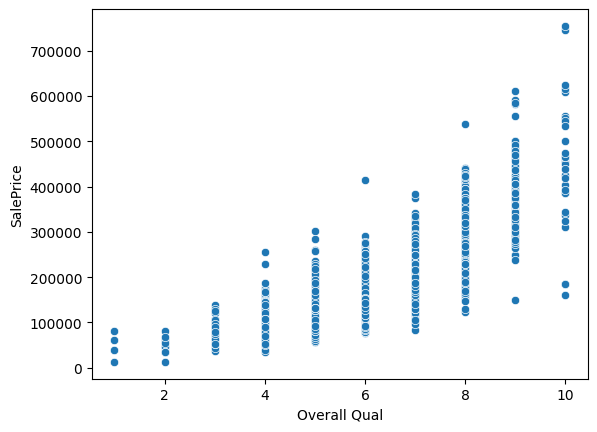

In [ ]:
# Точечная диаграмма (scatterplot) по столбцам 'Overall Qual' (общее качество) и 'SalePrice' (продажная цена)
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

Наблюдение:<br>
Общее качество находится между 1 и 10. И мы можем видеть выбросы.
Мы можем видеть некоторые точки с очень низкой ценой продажи, но с общим качеством 09 и 10.
Давайте попробуем следующий признак с самой высокой корреляцией, т. е. Gr Liv Area.

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

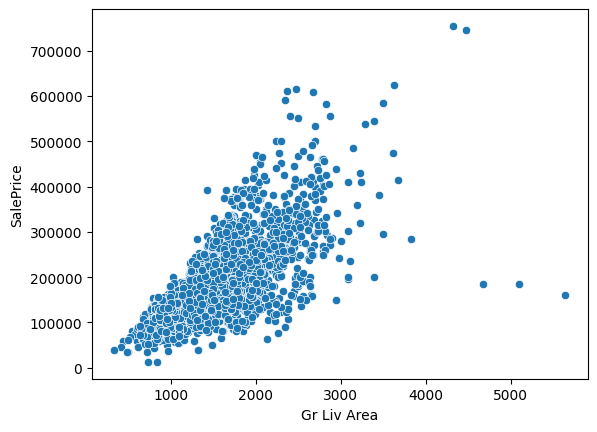

In [ ]:
sns.scatterplot(data=df, x='Gr Liv Area',y='SalePrice')

Наблюдение:
Мы снова видим 3 пункта с более высокой площадью Gr Liv и меньшей SalePrice.
Давайте определим то же самое с пандами.

In [ ]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

In [ ]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

Наблюдение:
Итак, на самом деле у нас есть 4 точки, которые имеют более высокое общее качество, но с очень низкой продажной ценой.
И 3 балла при большей жилой площади и меньшей продажной цене. И эти 3 пункта общие. Давайте отбросим строки со значениями индекса 1498,2180,2181.

In [ ]:
# удаляем выбросы на основе значений индекса
df = df.drop(index=[1498,2180,2181],axis=0)

In [ ]:
df.shape

(2927, 82)

Мысли :
Поэтому мы удалили выявленные выбросы и данные сократились до 2927 строк вместо первоначальных 2930.
Но мы также можем исследовать три пункта, были ли эти три пункта самыми старыми или самыми последними. Являются ли это изменениями тенденций?
Мы также можем изучить другие условия для выбросов. Но давайте удовлетворимся всем, что у нас есть на данный момент в отношении выбросов.
Далее давайте сделаем что-нибудь с отсутствующими данными.

DATA CLEANUP - MISSING DATA

Удаление PID
У нас уже есть индекс, поэтому нам не нужен уникальный идентификатор PID для регрессии, которую мы выполним позже.

In [ ]:
df = df.drop("PID",axis=1)

In [ ]:
len(df.columns)

81

<font color=darkgreen><b>Процент отсутствующих значений</b></font>
<br>
Важно выяснить, каков процент пропущенных значений для каждого столбца, прежде чем мы на самом деле будем действовать так же. В случае, если в конкретном столбце отсутствует большинство значений, нет смысла применять то же самое для машинного обучения.
Итак, мы создаем функцию, которую можно будет повторно использовать в будущих блокнотах.

In [ ]:
# Процент отсутствующих данных для каждой строки в наборе данных
def percent_missing(df):
    # вычисление процента отсутствующих данных
    percent_nan = 100 * df.isnull().sum() / len(df)
    # фильтрация 0 & сортировка
    percent_nan = percent_nan[percent_nan > 0].sort_values()

    return percent_nan

In [ ]:
percent_nan = percent_missing(df)
round(percent_nan,2)

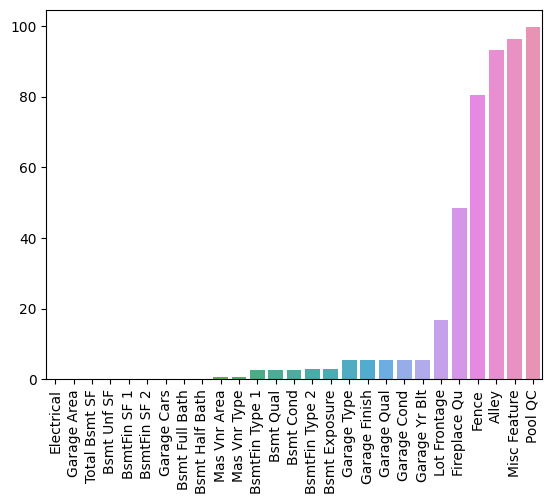

In [ ]:
# процент на гистограмме (barplot)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90); # Semicolon removes the text before charts

<font color=darkred>Наблюдение:</font><br>
В разных столбцах много пропущенных значений. В некоторых столбцах оно минимальное, но в некоторых столбцах большая часть данных отсутствует.
Однако отсутствие данных может иметь несколько последствий. Как, например, в случае с контролем качества пула, может оказаться, что предлагаемого пула нет.

В некоторых случаях, например, при электроснабжении или гараже, кажется, что отсутствует даже менее 1% данных.

Мы можем действовать по-разному для разных столбцов

Удалить строку с отсутствующими данными
Удаление всего столбца или объекта
Заменить недостающие данные
Интерпретируйте недостающие данные из других столбцов

Давайте сначала исследуем столбцы с менее чем 1% отсутствующих данных.

In [ ]:
# Столбцы с отсутствующими данными менее 1 %
round(percent_nan[percent_nan < 1],3)

Electrical        0.034
Garage Area       0.034
Total Bsmt SF     0.034
Bsmt Unf SF       0.034
BsmtFin SF 1      0.034
BsmtFin SF 2      0.034
Garage Cars       0.034
Bsmt Full Bath    0.068
Bsmt Half Bath    0.068
Mas Vnr Area      0.786
Mas Vnr Type      0.786
dtype: float64

В некоторых случаях может случиться так, что одна строка может содержать несколько отсутствующих столбцов данных.

In [ ]:
df[df['Electrical'].isnull()]

In [ ]:
df[df['Garage Area'].isnull()]

<font color = darkred><b>Наблюдение:</b></font>
<br>
Таким образом, недостающие данные по электрике и гаражу различаются. Но это только отдельные строки. Мы действительно можем подумать о том, чтобы отказаться от них.

In [ ]:
df = df.dropna(axis=0,subset=['Electrical','Garage Area'])

In [ ]:
len(df)

2925

In [ ]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

Наблюдение:
Мы видим, что нет. О столбцах с отсутствующими данными уже позаботились, просто удалив 2 строки.

In [ ]:
df[df['Bsmt Unf SF'].isnull()]

In [ ]:
df[df['Total Bsmt SF'].isnull()]

In [ ]:
df[df['BsmtFin SF 2'].isnull()]

In [ ]:
df[df['BsmtFin SF 1'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [ ]:
df[df['Bsmt Full Bath'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1498,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [ ]:
df.iloc[[1341,1497]]['Bsmt Qual']

1341    NaN
1497    NaN
Name: Bsmt Qual, dtype: object

Наблюдение:
Мы понимаем, что подвала нет. Поэтому лучше логически заменить числовые столбцы подвала на 0, а столбцы строк подвала - на None.

In [ ]:
# Numerical Basement Data
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [ ]:
# String Basement Data
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

(0.0, 1.0)

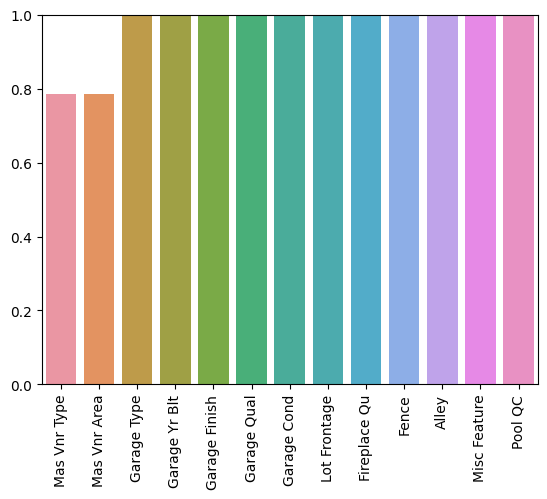

In [ ]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

Наблюдение:
Теперь в последних двух столбцах отсутствует менее 1% данных, т. е. тип Mas Vnr и область Mas Vnr.
Давайте проверим, каковы уникальные значения в Mas Vnr Type.

In [ ]:
df['Mas Vnr Type'].unique()

array(['Stone', 'None', 'BrkFace', nan, 'BrkCmn', 'CBlock'], dtype=object)

<font color=darkred><b>Наблюдение:</b></font><br>
Учитывая, что в приведенном выше результате есть уникальное значение None. Поэтому может случиться так, что отсутствующие значения Mas Vnr Type могут быть просто типом None.
Поэтому мы заменяем отсутствующий тип Mas Vnr на None, а также заменяем Mas Vnr Area на 0.

In [ ]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

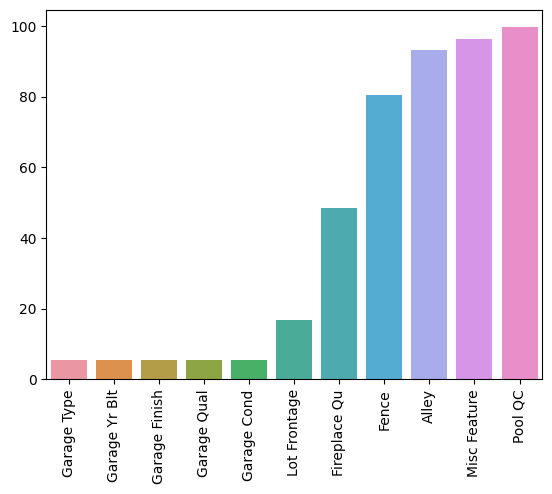

In [ ]:
percent_nan = percent_missing(df)
# Plot the percentage in a barplot
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

<font color=darkred><b>Наблюдение:</b></font><br>
Итак, теперь все наши недостающие данные составляют более 1%. Мы не можем думать, по крайней мере, о том, чтобы отказаться от них. Какие варианты у нас есть?


Удаление столбцов функций. Это чрезвычайно просто. Но это логично, когда большая часть данных, например, 99% данных, отсутствует. С другой стороны, если в будущем этот столбец станет важным и мы от него откажемся, это действительно помешает нашей модели машинного обучения.
Заполнение недостающих данных. Мы искусственно изменяем основную истину. Необходимо применить преобразование ко всем будущим данным. В простом случае его фактическое значение может быть равно 0, и поэтому данные отсутствуют. В сложных случаях мы можем заменить отсутствующие или нулевые значения статистической оценкой.
Итак, давайте начнем излагать нашу логику.

Из приведенного выше графика вполне видно, что нет. особенности гаража отсутствуют. Может случиться так, что гаража в доме на самом деле нет. Следовательно, давайте обработаем то же самое, что и с нашим подвалом.

In [ ]:
df['Garage Type'].unique()

array(['Attchd', 'BuiltIn', 'Basment', 'Detchd', nan, 'CarPort', '2Types'],
      dtype=object)

In [ ]:
# Garage String Columns
gar_str_cols = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [ ]:
# Garage Numeric Columns
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [ ]:
percent_nan = percent_missing(df)
# Plot the percentage in a barplot
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

Наблюдение:
Опять же, для таких функций, как «Забор», «Аллея», «Разные функции» и «КК пула», мы видим, что более 80% данных отсутствуют.
Может случиться так, что в доме нет бассейна или аллеи. Поэтому мы можем заменить его чем-то вроде None или 0. Но опять же большая часть данных отсутствует.

Давайте на самом деле удалим функции из нашего набора данных.

In [ ]:
df = df.drop(['Fence','Alley','Misc Feature','Pool QC'],axis=1)

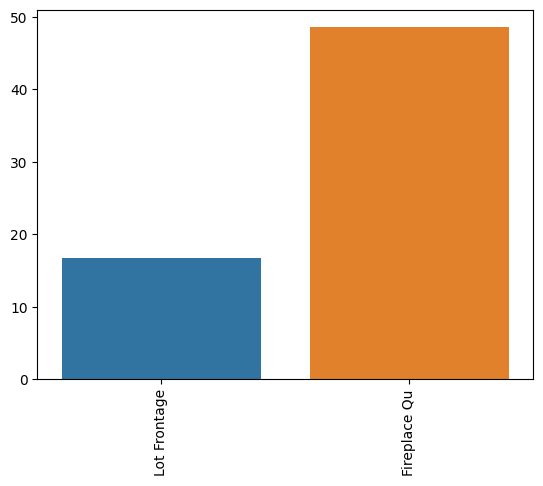

In [ ]:
percent_nan = percent_missing(df)
# Plot the percentage in a barplot
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

Наблюдение:
Наконец мы добрались до двух последних столбцов недостающих данных. Это нечто среднее между крайностями. Поэтому нам нужно быть особенно осторожными.

Давайте исследуем.

In [ ]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [ ]:
df['Lot Frontage'].value_counts()

60.0     276
80.0     137
70.0     133
50.0     116
75.0     105
        ... 
119.0      1
137.0      1
25.0       1
152.0      1
133.0      1
Name: Lot Frontage, Length: 128, dtype: int64

Наблюдение:
Из вышеизложенного очевидно, что Fireplace Qu имеет строку и, возможно, из-за недостающих данных камина нет. Поэтому мы заменим пропущенные значения на none.

Но в случае с фасадом участка это числовое значение с множеством вариаций. Из набора данных и немного *погуглив и погуглив* мы пришли к пониманию, что этот столбец может быть каким-то образом связан со столбцом «Соседство». Так что мы это тоже проверим.

In [ ]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

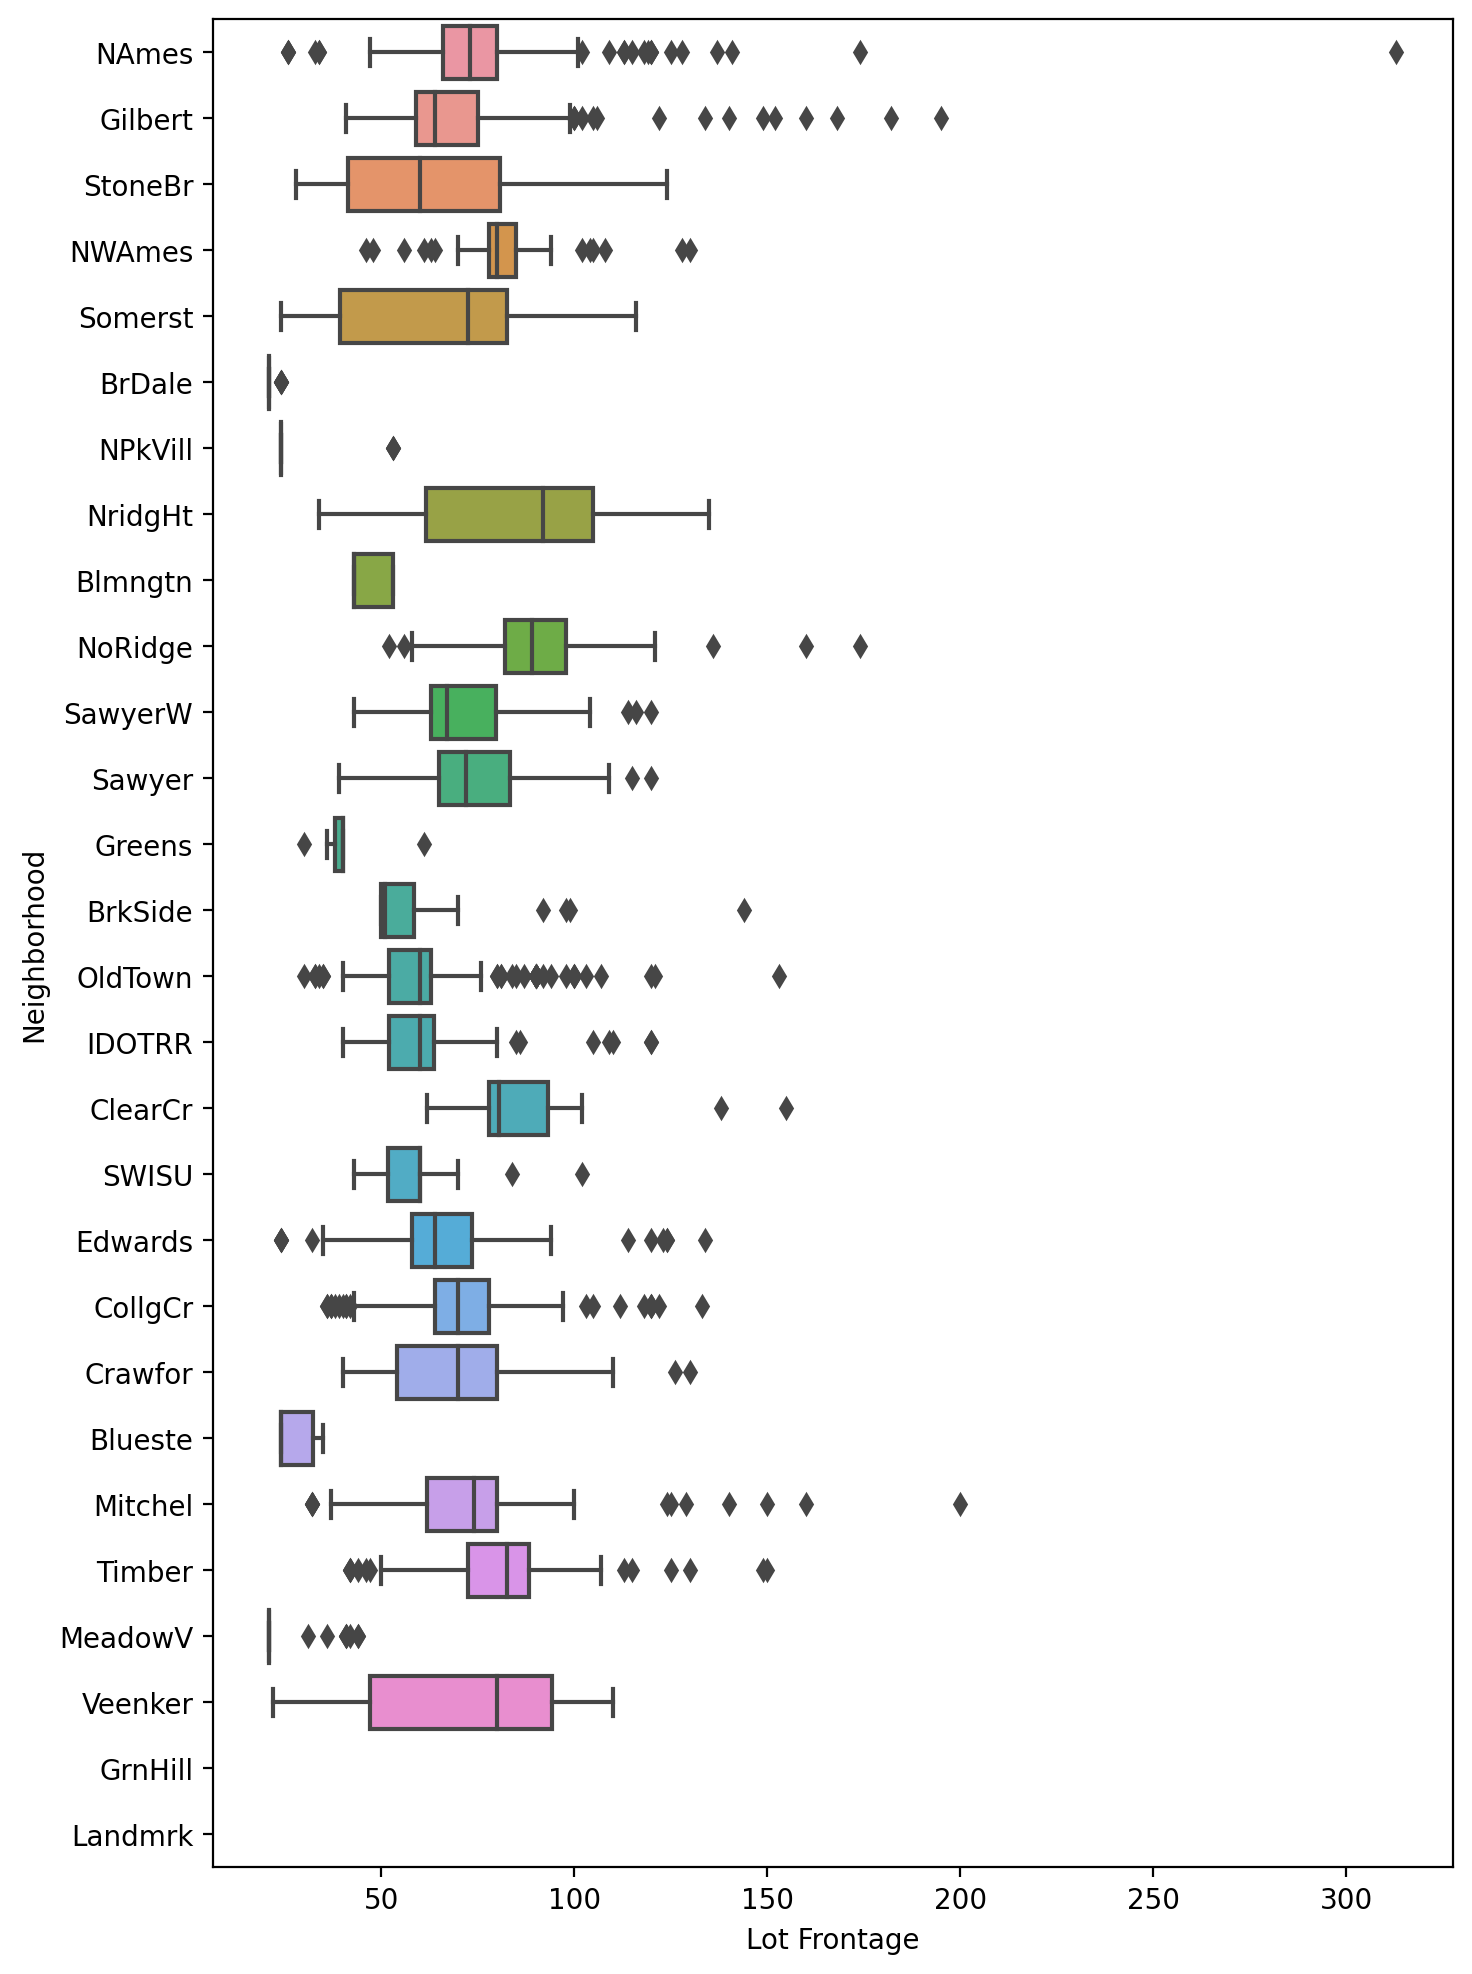

In [ ]:
plt.figure(figsize=(8,12),dpi=200) # To make the plot a bit taller for better visualisation
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

Наблюдение:
Хотя здесь много отклонений, не так уж нелогично предположить, что одни и те же районы будут иметь одинаковый фасад.
Поэтому мы решили поместить средний фасад участка в этом районе в недостающие значения параметра «Фронт участка».

In [ ]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [ ]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [ ]:
percent_nan = percent_missing(df)
percent_nan

Lot Frontage    0.102564
dtype: float64

In [ ]:
df.isnull().sum()

Order             0
MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 77, dtype: int64

Наблюдение:
Итак, у нас все еще есть 3 недостающих значения Lot Frontage. Если мы внимательно посмотрим на среднее значение для каждого района, мы обнаружим, что существуют районы GrnHill и Lndmark, средние значения которых равны NaN.

Возможно, у Лота нет фасада в этих кварталах. Поэтому мы заменяем их на 0.

In [ ]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [ ]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

DATA CLEANUP - TRANSFORMMING DATA

Мы попробуем поработать с некоторыми категориальными данными. Нам нужно будет выяснить категориальные поля.
Но начнем с того, что, как мы видим, MS SubClass, это категориальный столбец в целочисленном формате. Итак, мы преобразуем столбец в тип String.
Затем мы разобьем фрейм данных на строки и числовые столбцы. Мы заменим столбцы строк категориальными столбцами с помощью горячего кодирования и, наконец, соединим их с числовыми столбцами, чтобы завершить кадр данных.

In [ ]:
# Конвертация в строковый тип данных
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [ ]:
# Return all columns with String
object_df = df.select_dtypes(include='object')

In [ ]:
# Return all columns with Numerical Values
numeric_df = df.select_dtypes(exclude='object')

In [ ]:
# Replace with dummy variables
df_objects_dummies = pd.get_dummies(object_df,drop_first=True)

In [ ]:
# Concatenate the object with string to complete the dataframe
final_df = pd.concat([numeric_df,df_objects_dummies], axis=1)

In [ ]:
# Drop order column. Its just the index
final_df = final_df.drop('Order',axis=1)

In [ ]:
final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


**Linear Regression**

In [ ]:
# Break data into features and labels
X = final_df.drop('SalePrice',axis=1)
y = final_df['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
base_elastic_model = ElasticNet(max_iter=100000)

In [ ]:
param_grid = {'alpha':[0.1,1,10,100],'l1_ratio':[0.1,0.75,0.99,1]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_model = GridSearchCV(base_elastic_model,
                          param_grid=param_grid,
                         scoring = 'neg_mean_squared_error',
                         cv = 5, verbose = 2)

In [ ]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.4s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.5s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.5s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.4s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.5s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   5.4s
[CV] END ...........................alpha=0.1, l

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.098e+10, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time= 1.3min
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=  54.2s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time= 1.0min
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=  10.3s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.1s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.1s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.1s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.1s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.1s
[CV] END .............................alpha=1, l1_ratio=0.75; total time=   0.1s
[CV] END .............................alpha=1, l1_ratio=0.75; total time=   0.2s
[CV] END .............................alpha=1, l1_ratio=0.75; total time=   0.2s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=100000),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.75, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [ ]:
y_pred = grid_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(y_test,y_pred)

14195.354900562172

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

20558.508566893164

In [ ]:
np.mean(df['SalePrice'])

180815.53743589742

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
R2= round(r2_score(y_test, y_pred),2)

In [ ]:
R2

0.92